In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# İmage dosyasını okuma
myimage = cv2.imread('grass.png')
myimage = cv2.cvtColor(myimage,cv2.COLOR_BGR2RGB)
myimage = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)

In [3]:
# https://www.geeksforgeeks.org/how-to-generate-2-d-gaussian-array-using-numpy
# https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-79.php

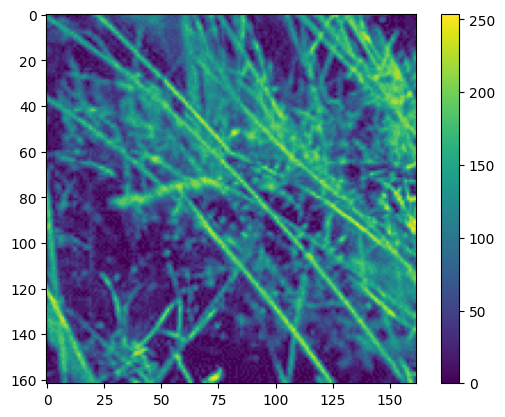

In [4]:
plt.imshow(myimage)
plt.colorbar()

In [5]:
# 1.  Create 2D dimension Gaussion
# Sigma kare = 2

# def gaussianSmooth(image, kernelSize = 5, sigma = 2**0.5):
#     '''
#     Bu fonksiyon verilen bir resmi gaussian yöntemine tabi tutarak resim yumuşatma işlemi yapar.

#     Parameters
#         image : Resim
#         kernelSize : Kernel matris boyutu
#         sigma : sigma değeri
    
#     Return
#         Fonsiyon çıktısı Gaussian uygulanmış resmi ve uygulanana kernel matrisini döndürür.
    
#     Notes
#         Default değer olarak kernelSize = 5, sigma = 2**0.5 olarak belirlenmiştir.
#     '''
#     max_abs = np.floor(kernelSize/2) # If kernelSize = 11
#     x_range = np.arange(-max_abs,max_abs +1,1) #(from -5 to +5 range)
#     y_range = np.arange(-max_abs,max_abs +1,1) #(from -5 to +5 range)
#     X,Y = np.meshgrid(x_range, y_range)
#     kernel = np.exp((-(X**2 + Y**2))/(2*sigma**2))/(2*np.pi*sigma**2)# Bulding Gaussian kernel
#     smoothed_img = cv2.filter2D(image,-1,kernel)# Convolution of the image with the kernel
#     return smoothed_img,kernel

# smoot_image, kernel  = gaussianSmooth(myimage)
# print(kernel)
# plt.imshow(smoot_image)
# plt.colorbar()


In [25]:
def gaussianSmooth(kernelSize = 11, sigma = 2**0.5):
    '''
    Bu fonksiyon verilen bir resmi gaussian yöntemine tabi tutarak resim yumuşatma işlemi yapar.

    Parameters
        image : Resim
        kernelSize : Kernel matris boyutu
        sigma : sigma değeri
    
    Return
        Fonsiyon çıktısı Gaussian uygulanmış resmi ve uygulanana kernel matrisini döndürür.
    
    Notes
        Default değer olarak kernelSize = 5, sigma = 2**0.5 olarak belirlenmiştir.
    '''
    max_abs = np.floor(kernelSize/2) # If kernelSize = 11
    x_range = np.arange(-max_abs,max_abs +1,1) #(from -5 to +5 range)
    number_of_samples = int(2 * max_abs + 1)
    x_1 = np.linspace(-max_abs,max_abs, num = number_of_samples)
    print(x_1)
    print(x_range)
    y_range = np.arange(-max_abs,max_abs +1,1) #(from -5 to +5 range)
    X,Y = np.meshgrid(x_range, y_range)
    kernel = np.exp((-(X**2 + Y**2))/(2*sigma**2))/(2*np.pi*sigma**2)# Bulding Gaussian kernel
    # smoothed_img = cv2.filter2D(image,-1,kernel)# Convolution of the image with the kernel
    return kernel

GaussKernel = gaussianSmooth()
print(GaussKernel)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
[[2.96557637e-07 2.81366052e-06 1.61914983e-05 5.65138822e-05
  1.19639890e-04 1.53620659e-04 1.19639890e-04 5.65138822e-05
  1.61914983e-05 2.81366052e-06 2.96557637e-07]
 [2.81366052e-06 2.66952677e-05 1.53620659e-04 5.36188786e-04
  1.13511167e-03 1.45751223e-03 1.13511167e-03 5.36188786e-04
  1.53620659e-04 2.66952677e-05 2.81366052e-06]
 [1.61914983e-05 1.53620659e-04 8.84025856e-04 3.08555342e-03
  6.53211664e-03 8.38740379e-03 6.53211664e-03 3.08555342e-03
  8.84025856e-04 1.53620659e-04 1.61914983e-05]
 [5.65138822e-05 5.36188786e-04 3.08555342e-03 1.07696397e-02
  2.27993273e-02 2.92749158e-02 2.27993273e-02 1.07696397e-02
  3.08555342e-03 5.36188786e-04 5.65138822e-05]
 [1.19639890e-04 1.13511167e-03 6.53211664e-03 2.27993273e-02
  4.82661763e-02 6.19749972e-02 4.82661763e-02 2.27993273e-02
  6.53211664e-03 1.13511167e-03 1.19639890e-04]
 [1.53620659e-04 1.45751223e-03 8.38740379e-03 2

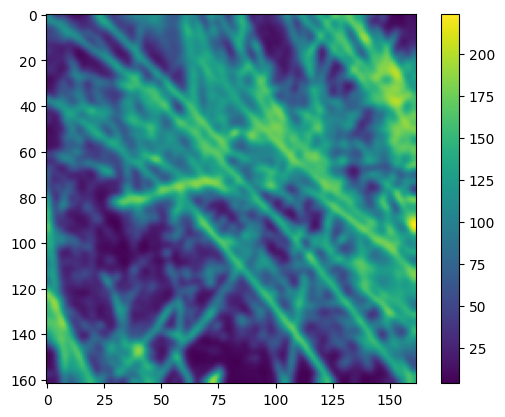

In [7]:
smoothed_img = cv2.filter2D(myimage,-1,GaussKernel)# Convolution of the image with the kernel

plt.imshow(smoothed_img)
plt.colorbar()

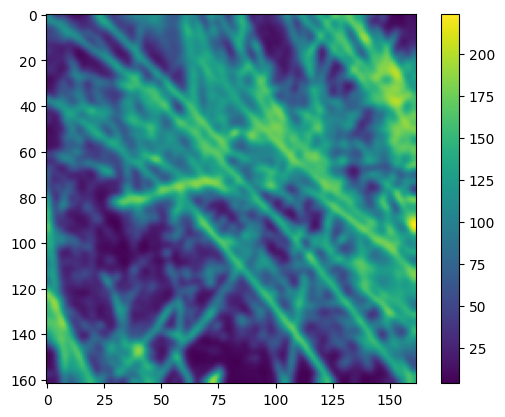

In [8]:
# 2. CONVOLUTION with kernel

kernel = cv2.flip(GaussKernel,0)
convolutionImage = cv2.filter2D(myimage,-1,kernel) # Convolution

plt.imshow(convolutionImage)
plt.colorbar()

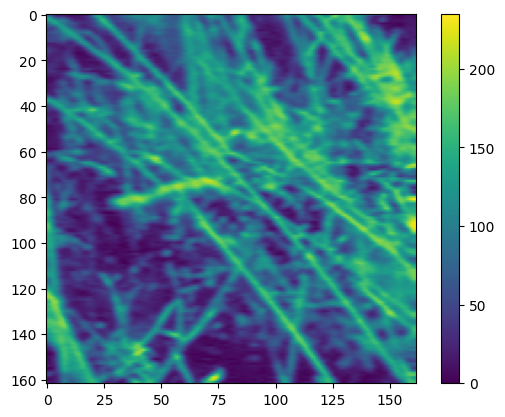

In [9]:
# 1D Gaussion
def OneDimension(sigma = 2**0.5, width = 11):
    
    hwidth = round((width-1)/2)
    x = np.arange(-hwidth, hwidth+1,1)
    
    g = np.exp(-x**2/(2*sigma**2))
    return g/np.sum(g)

OneDimesionGauss=OneDimension()
OneDimesionGauss=np.reshape(OneDimesionGauss,(1,-1))

OneDimensionİmage = cv2.filter2D(myimage,-1,OneDimesionGauss)
plt.imshow(OneDimensionİmage)
plt.colorbar()

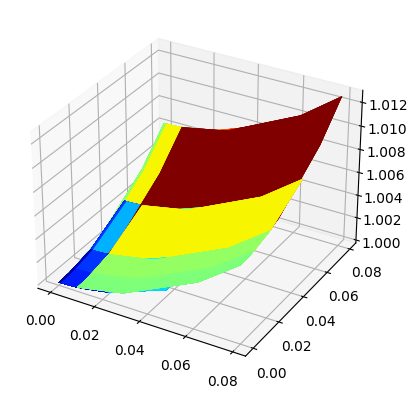

In [10]:
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
# print(GaussKernel)
# x = GaussKernel
# y = GaussKernel.T
# z = np.cos(x ** 2 + y ** 2)

# fig = plt.figure()
# ax = plt.axes(projection='3d')

# ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
# ax.set_title('Surface plot')
# plt.show()

from matplotlib import cm

x=GaussKernel
# print(x)
y=GaussKernel.T


x, y = np.meshgrid(x, y)
# print(x)

z = np.exp(x**2+y**2)
# print(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, cmap=cm.jet)
plt.show()